In [11]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def inicializar(fileName):
    path = fileName
    img = Image.open(path)
    s = float(os.path.getsize(path))/1000
    print("Tamanho(dimensão): ", img.size)
    plt.title("Imagem Original (%0.2f Kb):" %s)
    plt.imshow(img)

    return img

In [12]:
def convert2Gray(img):
    imggray = img.convert('LA')
    imgmat = np.array( list(imggray.getdata(band = 0)), float)
    imgmat.shape = (imggray.size[1], imggray.size[0])
    imgmat = np.matrix(imgmat)
    plt.figure()
    plt.imshow(imgmat, cmap = 'gray')
    plt.title("Imagem depois de ser convertida pra preto e branco")
    plt.show()
    
    return imgmat


In [19]:
def iteracoes(imgmat):
    print("Depois da compressão: ")
    U, S, Vt = SVD_Decomposition(imgmat) # SVD
    for i in range(5, 70, 10):
        cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
        plt.imshow(cmpimg, cmap = 'gray')
        title = " k =  %s" %i
        plt.title(title)
        plt.show()
        result = Image.fromarray((cmpimg ).astype(np.uint8))
    result.save('Comprimida.jpg')

In [20]:
def SVD_Decomposition(img):
    return  np.linalg.svd(imgmat) 

Tamanho(dimensão):  (1366, 768)


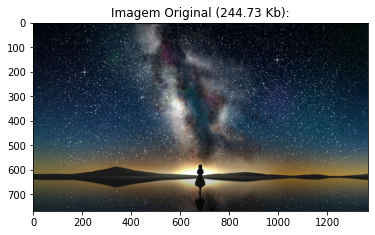

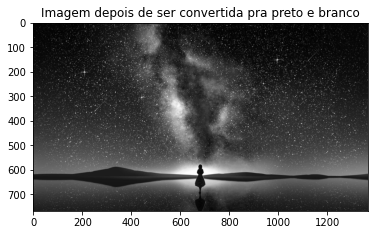

Depois da compressão: 


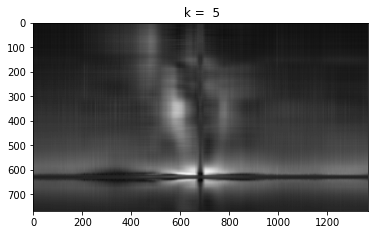

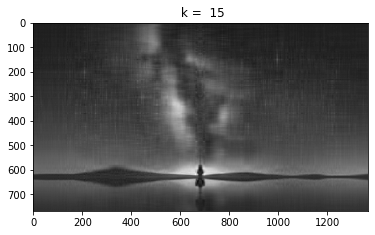

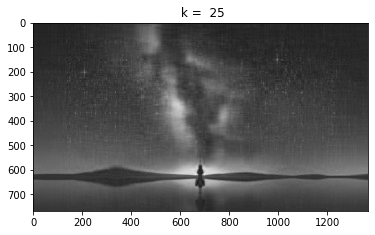

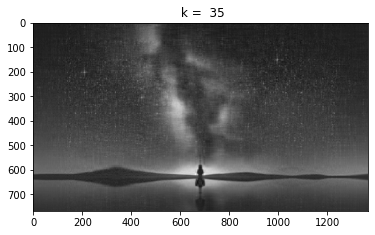

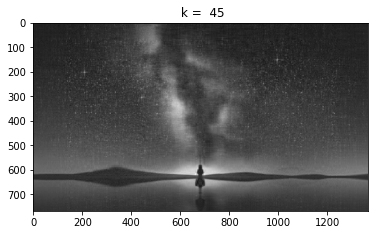

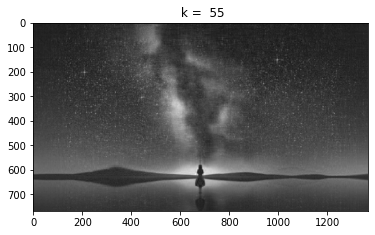

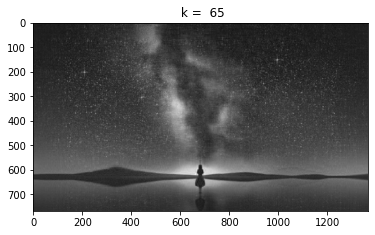

In [21]:
def main():
    img = inicializar('802549.jpg')
    grayImage = convert2Gray(img)
    iteracoes(grayImage)
    
main()